# Part g): Analysis of real data 

### Importing terrain data

/tmp/ipykernel_12849/2062259365.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain1 = imread("SRTM_data_Norway_1.tif")


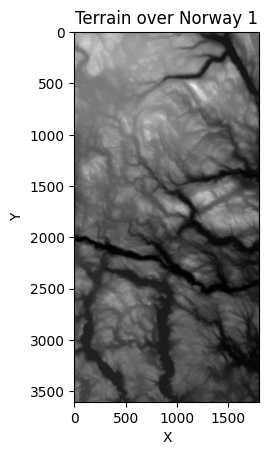

(3601, 1801)


In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import functions as f

# Load the terrain
terrain1 = imread("SRTM_data_Norway_1.tif")
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
print(terrain1.shape)


### Analysis of terrain data

In [2]:

# Load the terrain data
terrain_data = imread("SRTM_data_Norway_1.tif")

# Define the x and y coordinates
#x = np.arange(0, terrain_data.shape[1])
#y = np.arange(0, terrain_data.shape[0])
x = np.arange(0,400)
y = np.arange(0,400)

# Create a meshgrid of the x and y coordinates
xv, yv = np.meshgrid(x, y)
z = terrain_data[1200:1600,1300:1700]

terrain_data.shape

/tmp/ipykernel_12849/1549054684.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain_data = imread("SRTM_data_Norway_1.tif")


(3601, 1801)

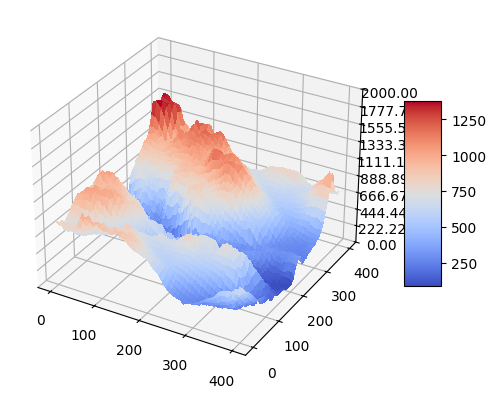

In [3]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0,2000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

"At the end, you should present a critical evaluation of your results and discuss
the applicability of these regression methods to the type of data presented here
(either the terrain data we propose or other data sets)"

# OLS Reproduction

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
#z = z + np.random.normal(0, 1, z.shape)
degree = 10
print(x.shape)
print(y.shape)

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X = poly_features.fit_transform(np.column_stack((x, y)))

 # Split the data into training and test data
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

# Scale and center the data
scaler = StandardScaler(with_std=True, with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

OLSbeta = f.beta_OLS(X_train, z_train)
print(OLSbeta.shape)
ztilde = f.z_predict(X_test, OLSbeta)
print(ztilde.shape)
#ztilde = ztilde.reshape(xv.shape)
mse = f.mse(z_test, ztilde)
R2 = f.r2(z_test, ztilde)

#print(f"Beta: {OLSbeta}")
print(f"Mse: {mse}")
print(f"R2: {R2}")
x = X_test[:,1]
y = X_test[:,2]
print(x.shape)
print(ztilde.shape)

(400,)
(400,)
(66, 400)
(80, 400)
Mse: 3060.980779314827
R2: 0.9600833559951211
(80,)
(80, 400)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6400, 6400) and arg 2 with shape (80, 400).

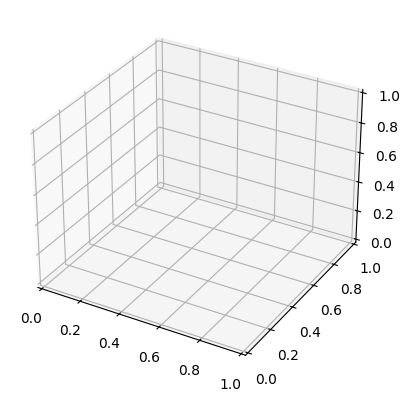

In [7]:


x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(x, y, ztilde, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 2000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Ridge reproduction

In [ ]:
z = z + np.random.normal(0, 1, z.shape)
degree = 3

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X = poly_features.fit_transform(np.column_stack((x, y)))

OLSbeta = f.beta_OLS(X, z)
ztilde = f.z_predict(X, OLSbeta)
mse = f.mse(z, ztilde)
R2 = f.r2(z, ztilde)

#print(f"Beta: {OLSbeta}")
print(f"Mse: {mse}")
print(f"R2: {R2}")

Mse: 66388.14174479633
R2: 0.21513190258525172


/tmp/ipykernel_10760/2348136738.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  z = z + np.random.normal(0, 1, z.shape)
